# Lesson 1: Why Federated Learning?

Welcome to Lesson 1!

To access the `requirements.txt` and `utils1.py` file for this course, go to `File` and click `Open`.

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import sys
sys.path.append('/content/drive/MyDrive/Internship Arsen HERVET 2025/Tutorials Code/L1')


In [2]:
!pip install -r requirements.txt


     ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
     ---------------------------------------- 43.6/43.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
     ---------------------------------------- 74.8/74.8 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
   ------------------------ --------------- 256.0/421.5 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 421.5/421.5 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
    --------------------------------------- 0.5/22.6 MB 14.2 MB/s eta 0:00:02
   - -------------------------------------- 1.0/22.6 MB 13.3 MB/s eta 0:00:02
   - -------------------------------------- 1.0/22.6 MB 13.3 MB/s eta 0:00:02
   -- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ast-scope 0.3.1 requires attrs==19.3.0, but you have attrs 25.3.0 which is incompatible.
okpy 1.18.1 requires attrs==19.3.0, but you have attrs 25.3.0 which is incompatible.
okpy 1.18.1 requires requests==2.22.0, but you have requests 2.32.3 which is incompatible.
pylint 3.0.2 requires colorama>=0.4.5; sys_platform == "win32", but you have colorama 0.4.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 1. Import utils

In [3]:
from utils1 import *

#### 2. Import the MNIST dataset

* Load the MNIST dataset using the `datasets.MNIST` function.

In [4]:
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

* Split the training dataset to three datasets for this example.

In [5]:
total_length = len(trainset)
split_size = total_length // 3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

* Set the three different datasets, excluding some digits as shown in the explanation.
    - `part1` excludes digits 1, 3, and 7.
    - `part2` excludes digits 2, 5, and 8.
    - `part3` excludes digits 4, 6, and 9.

This simulates the different datasets that might be available in real world (datasets with missing data, extra data, etc).

In [6]:
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

> Note: The function ```exclude_digits``` has been provided for your use. You can find it in the `utils1.py` file.

  To access this file, go to `File` and click `Open`.

* Plot the three datasets.

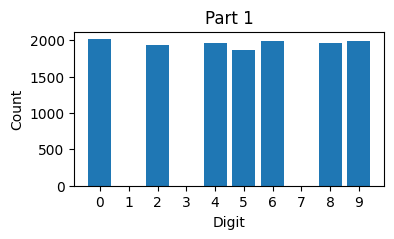

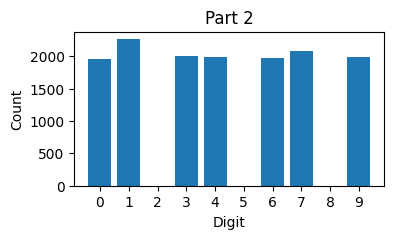

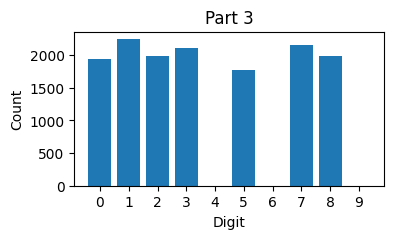

In [7]:
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

#### 3. Train and test the models

* Define three and run the models.

Three instances of the `SimpleModel` class (`model1`, `model2`, `model3`) are created for training.
Find the `SimpleModel` class in the `utils1.py` file.

In [8]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065382014873416
Epoch 2: Loss = 0.24500494176565216
Epoch 3: Loss = 0.19132229859052702
Epoch 4: Loss = 0.15808402188988618
Epoch 5: Loss = 0.1317168086160754
Epoch 6: Loss = 0.11005786858758954
Epoch 7: Loss = 0.09560647581725619
Epoch 8: Loss = 0.08431708378673985
Epoch 9: Loss = 0.0709400400649323
Epoch 10: Loss = 0.0613757313077533
Training complete
Epoch 1: Loss = 0.3983497708104551
Epoch 2: Loss = 0.18235595449472644
Epoch 3: Loss = 0.1642766196829533
Epoch 4: Loss = 0.1346918883417467
Epoch 5: Loss = 0.12096210683064003
Epoch 6: Loss = 0.09922834034244131
Epoch 7: Loss = 0.09154477070634519
Epoch 8: Loss = 0.08096778528228502
Epoch 9: Loss = 0.07251403305313683
Epoch 10: Loss = 0.06491988018803697
Training complete
Epoch 1: Loss = 0.5017053608757418
Epoch 2: Loss = 0.2649856668871802
Epoch 3: Loss = 0.20764534314674837
Epoch 4: Loss = 0.1648575153101135
Epoch 5: Loss = 0.13950551686355392
Epoch 6: Loss = 0.12051728502889206
Epoch 7: Loss = 0.10085867242971519


#### 4. Evaluate the models

* Load the test dataset.

In [9]:
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

* Dataset preparation:
   - `testset_137` includes digits 1, 3, and 7.
   - `testset_258` includes digits 2, 5, and 8.
   - `testset_469` includes digits 4, 6, and 9.

In [10]:
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

> Note: The function ```include_digits``` has been provided for your use. You can find it in the `utils1.py` file.

  To access this file, go to `File` and click `Open`.

* Evaluate the models with the test datasets.

The `evaluate_model` function is called to evaluate each model defined above (`model1`, `model2`, `model3`) on both, the entire test dataset and specific subsets of the test dataset.

In [11]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6570, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6872, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6848, Test Accuracy on [4,6,9]: 0.0000


* Analyze the results looking at the 'confusion matrix' for the three models just trained using the ```compute_confusion_matrix```. You can find this function in the `utils1.py` file.

  To access this file, go to `File` and click `Open`.

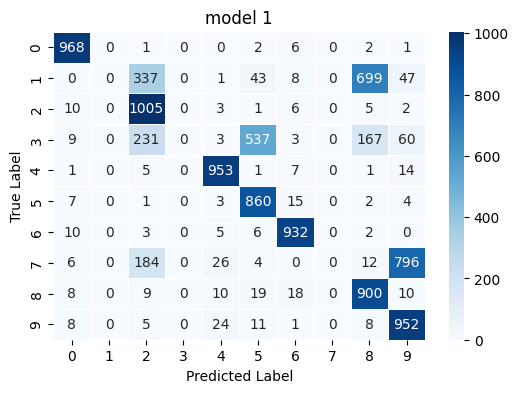

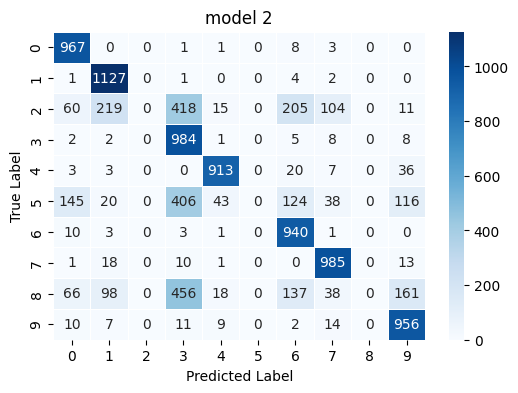

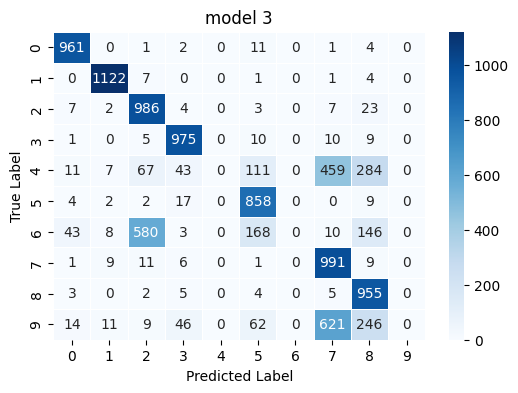

In [12]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")